<a href="https://colab.research.google.com/github/moustafa-7/Car-GANs_project/blob/master/Number_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

In [0]:
np.random.seed(10)

random_dim = 100

In [0]:
def load_minst_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  
  x_train = (x_train.astype(np.float32) -127.5) / 127.5  # 
  
  x_train = x_train.reshape(-1, 784)
  
  return (x_train, y_train , x_test, y_test)

In [0]:
data = load_minst_data()

In [0]:
def get_optimizer():
  return Adam(lr = 0.0001, beta_1 = 0.5)

In [0]:
optimizer = get_optimizer()

In [0]:
def get_generator(optimizer):
  generator = Sequential()
  
  generator.add(Dense(256, input_dim = random_dim, kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(784, activation = 'tanh'))
  generator.compile(loss = 'binary_crossentropy', optimizer = optimizer)
  
  # generator.summary()
  
  return generator

In [0]:
generator = get_generator(optimizer)

In [0]:
def get_discriminator(optimizer):
  discriminator = Sequential()
  
  discriminator.add(Dense(1024, input_dim = 784, kernel_initializer = initializers.RandomNormal(stddev = 0.02)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(128))
  discriminator.add(LeakyReLU(0.2))
  
  discriminator.add(Dense(1, activation = 'sigmoid'))
  discriminator.compile(loss = 'binary_crossentropy', optimizer = optimizer)
  
  # discriminator.summary()
  
  return discriminator
                    
  

In [0]:
discriminator = get_discriminator(optimizer)

In [0]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
  discriminator.trainable = False
  
  gan_input = Input(shape = (random_dim,))
  
  x = generator(gan_input)
  
  gan_output = discriminator(x)
  
  gan = Model(inputs = gan_input, outputs = gan_output)
  gan.compile(loss = 'binary_crossentropy', optimizer = optimizer)
  
  return gan

In [0]:
gan = get_gan_network(discriminator, random_dim, generator, optimizer)

In [0]:
def plot_generated_images(epoch, generator, examples = 100, dim = (10,10), fig_size = (10,10)):
  
  noise = np.random.normal(0,1, size=[examples, random_dim])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(-1, 28, 28)
  
  plt.figure(figsize = fig_size)
  
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation = 'nearest', cmap = 'gray_r')
    plt.axis('off')
    
  plt.tight_layout()
  plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

In [0]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] / batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(int(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
--------------- Epoch 24 ---------------
--------------- Epoch 25 

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


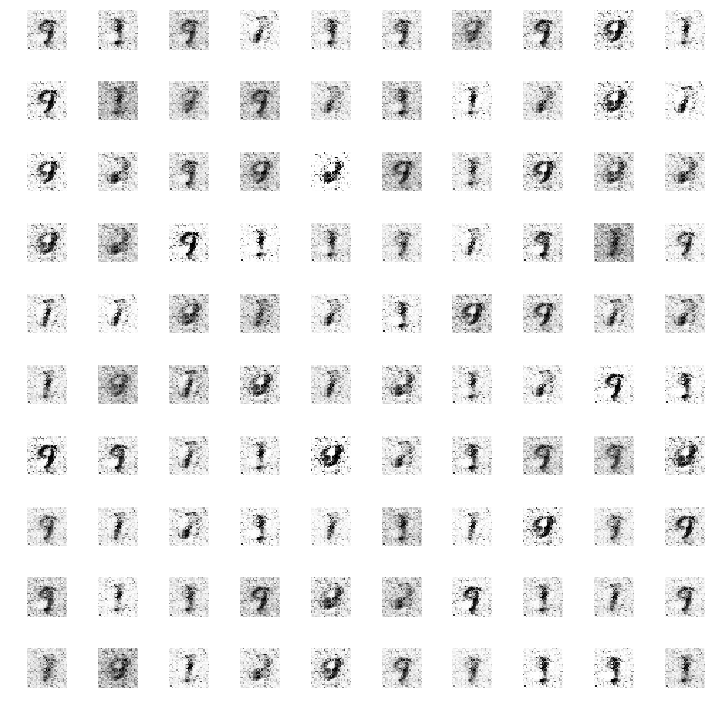

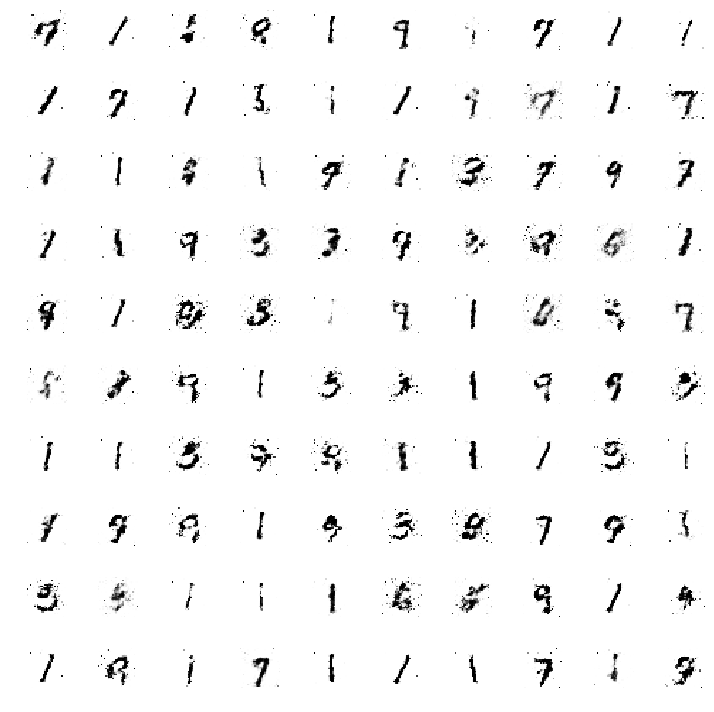

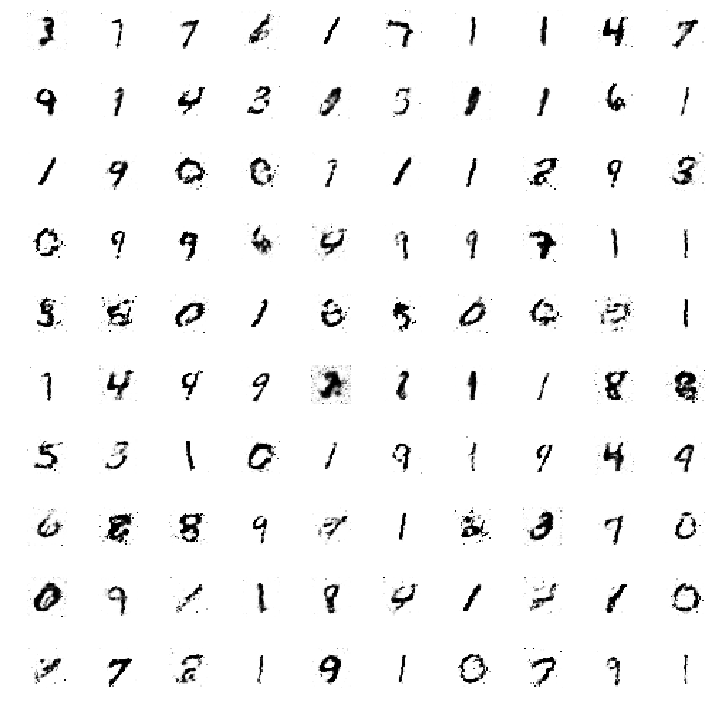

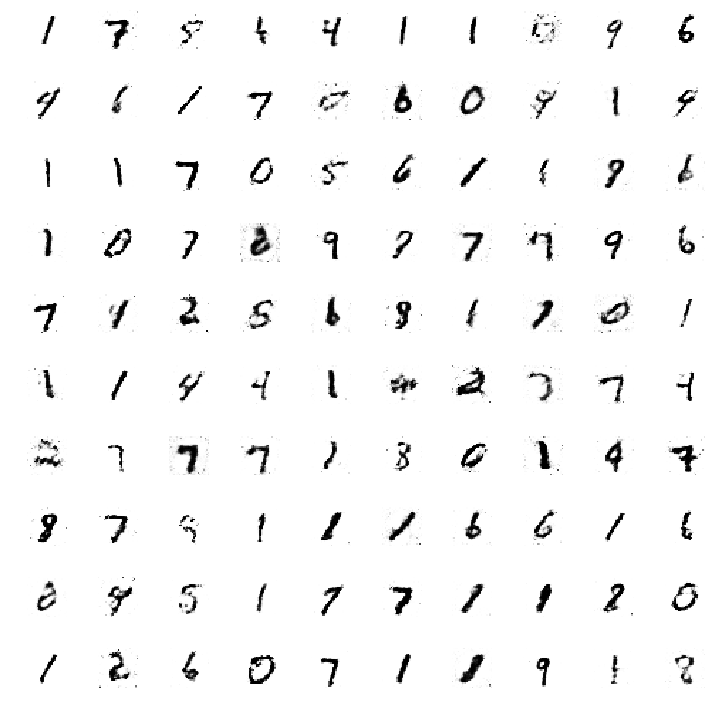

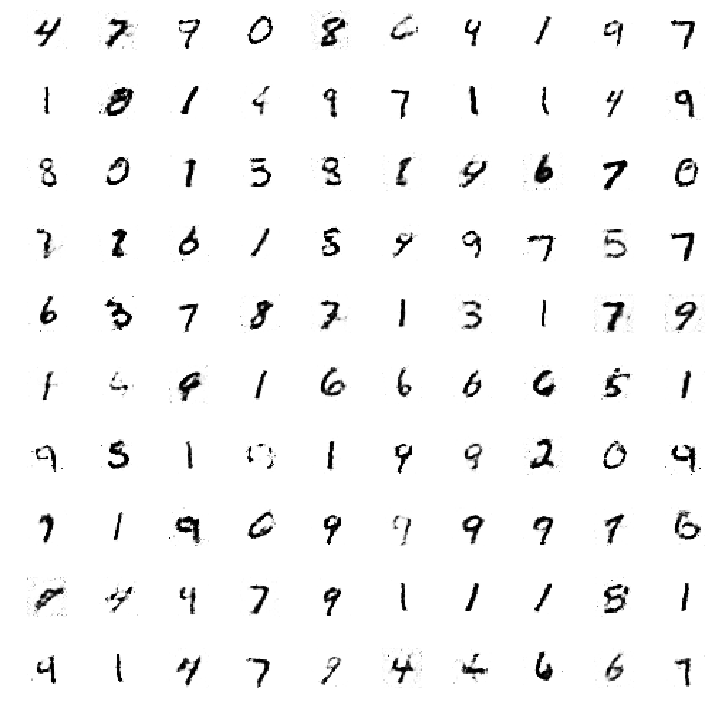

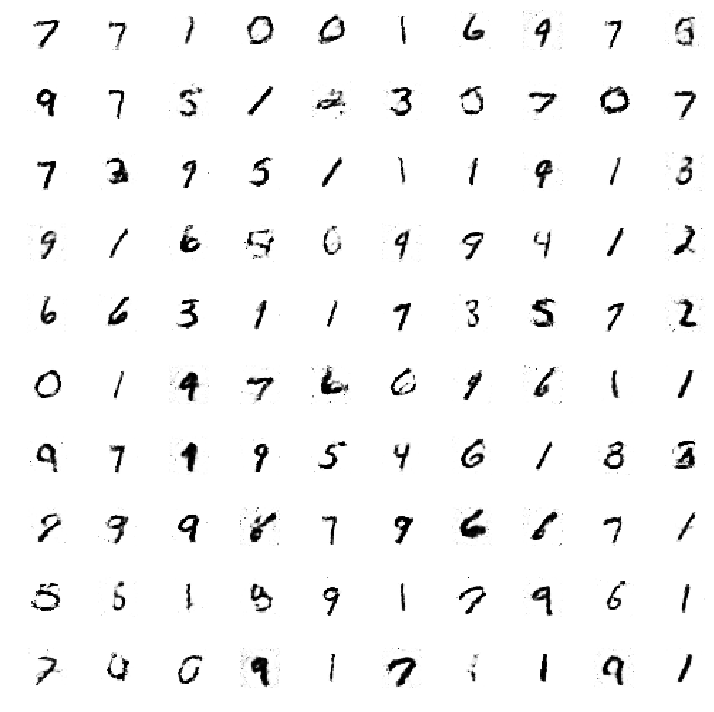

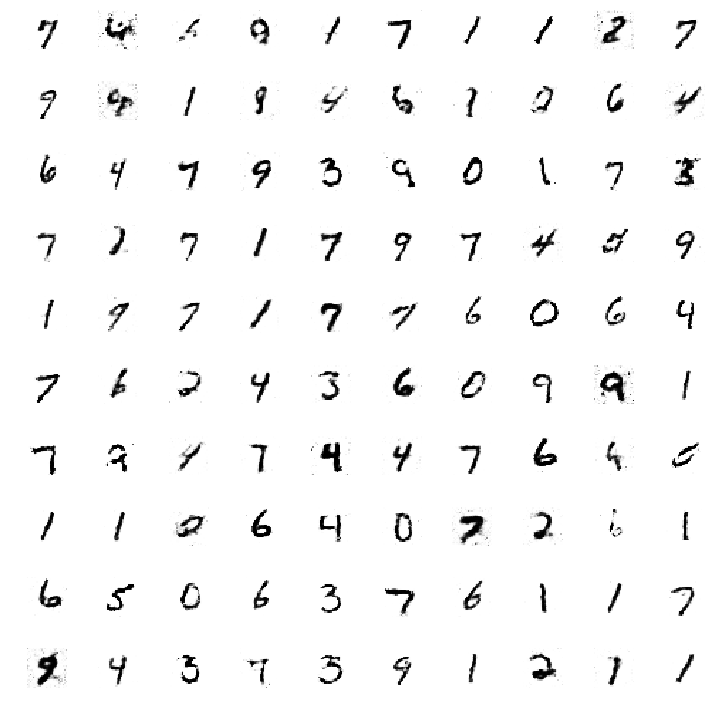

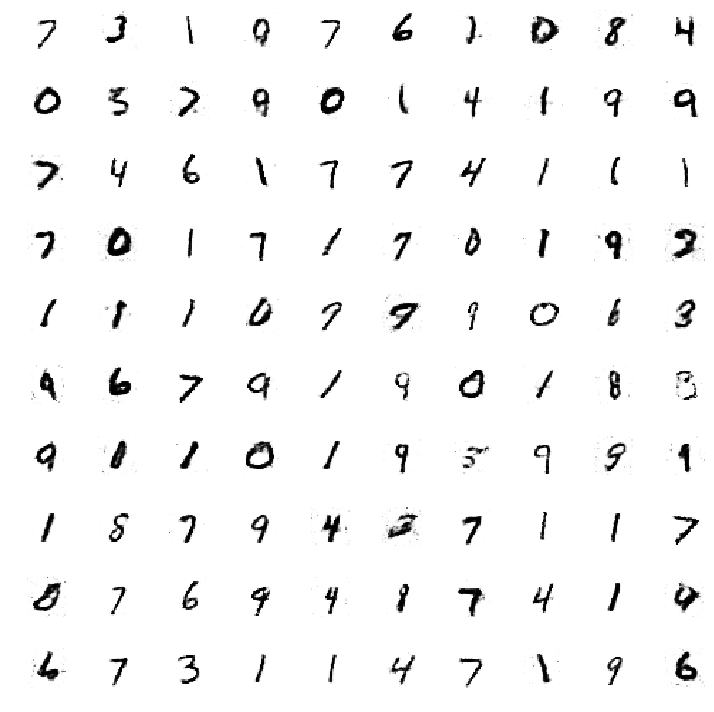

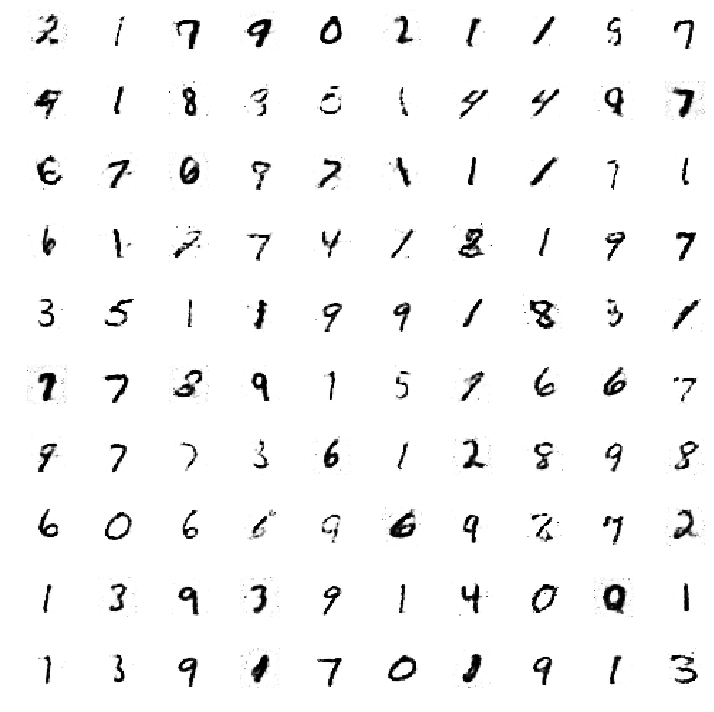

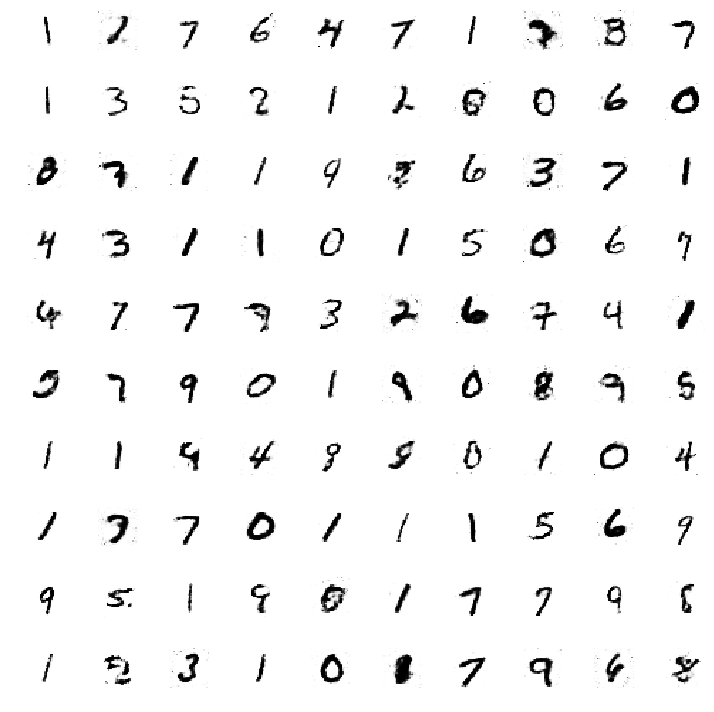

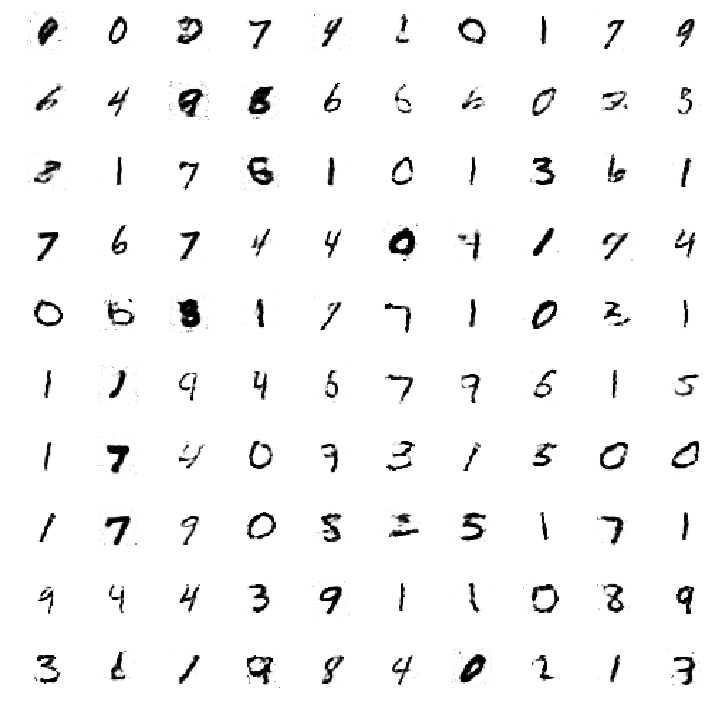

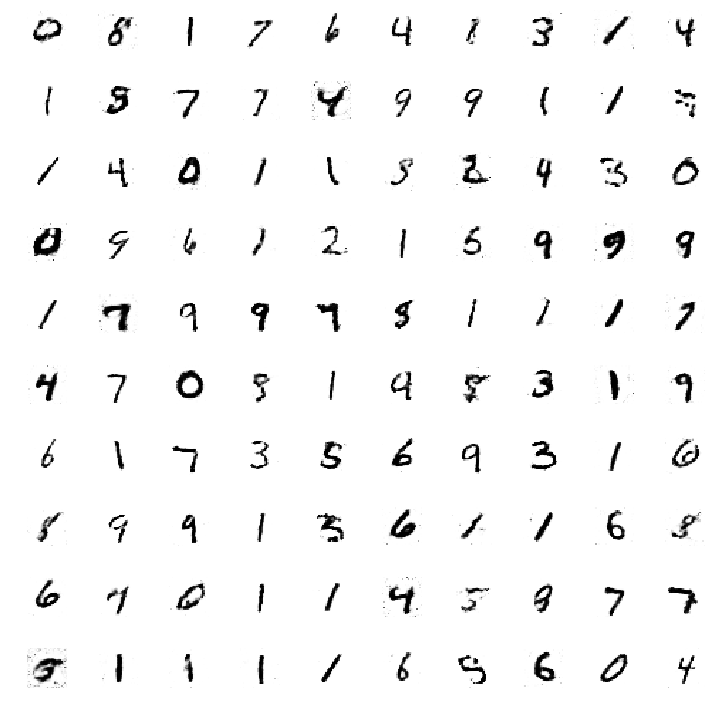

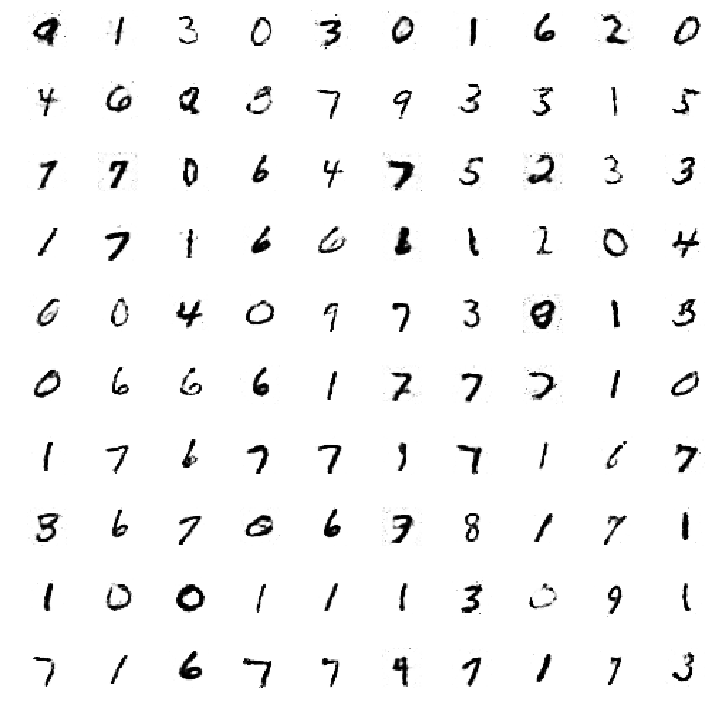

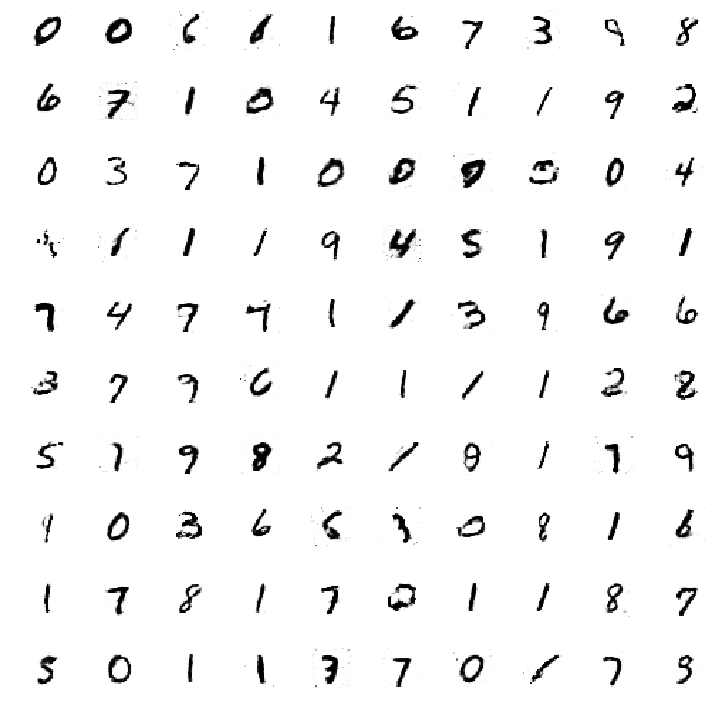

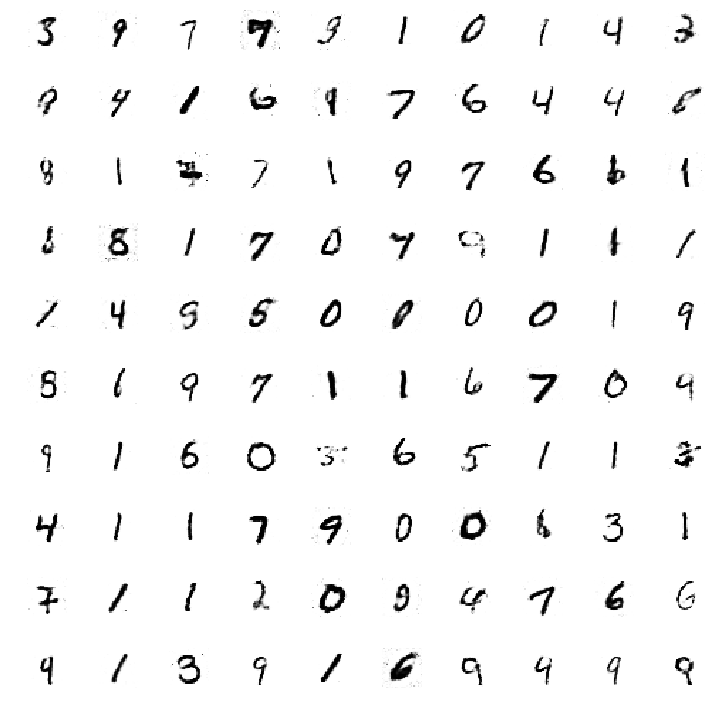

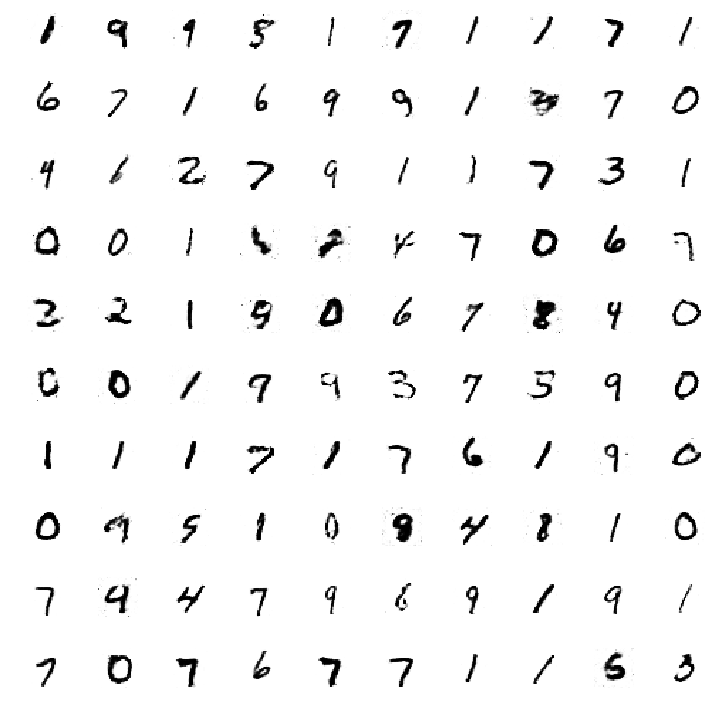

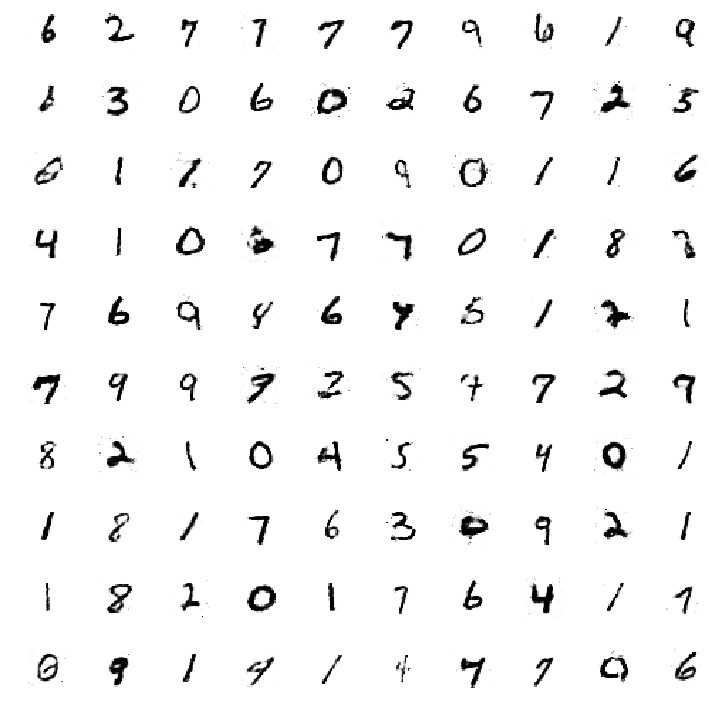

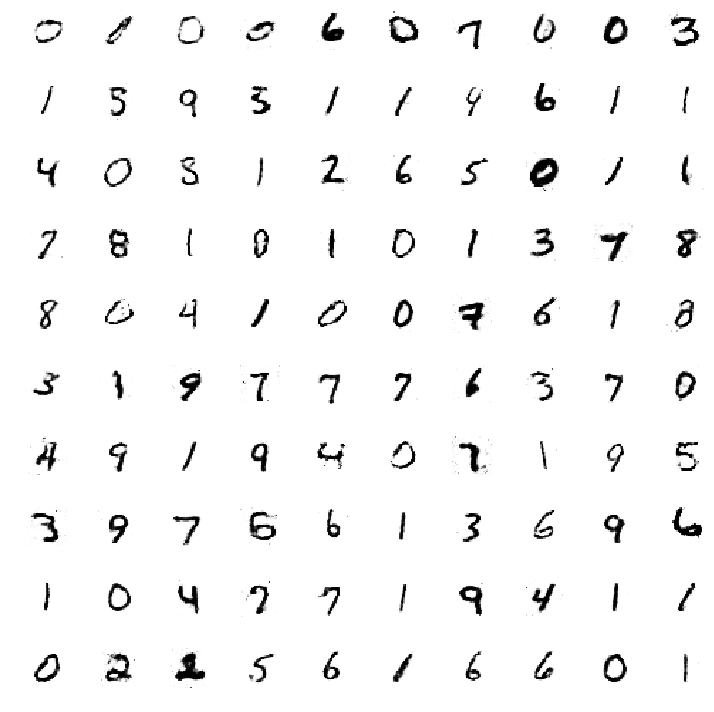

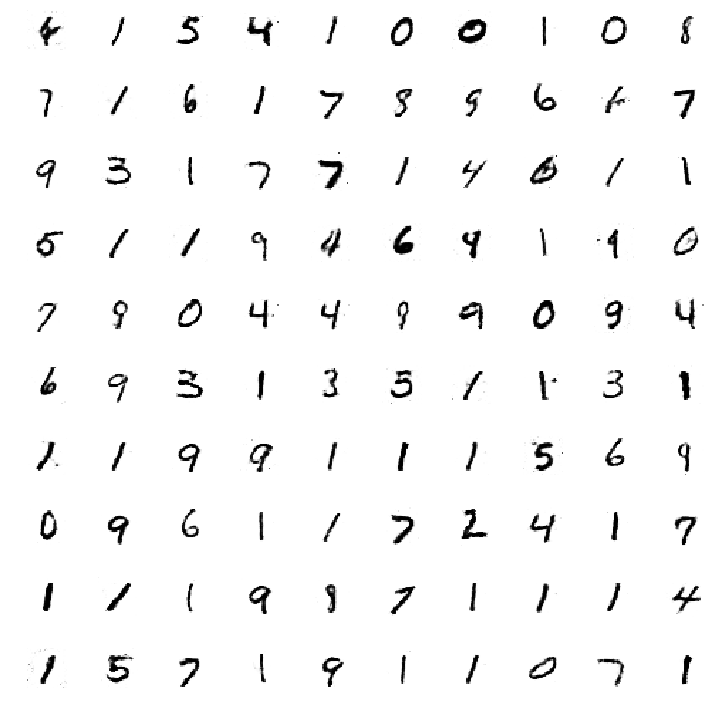

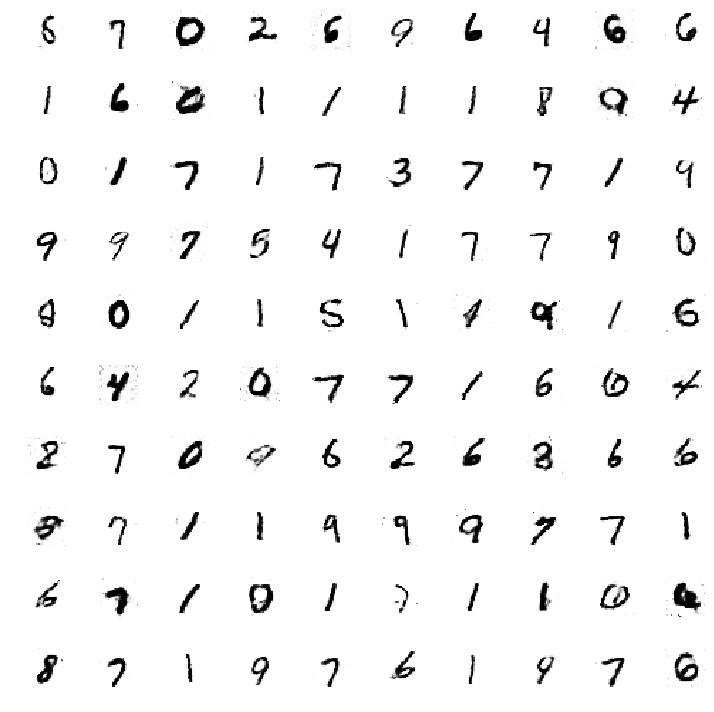

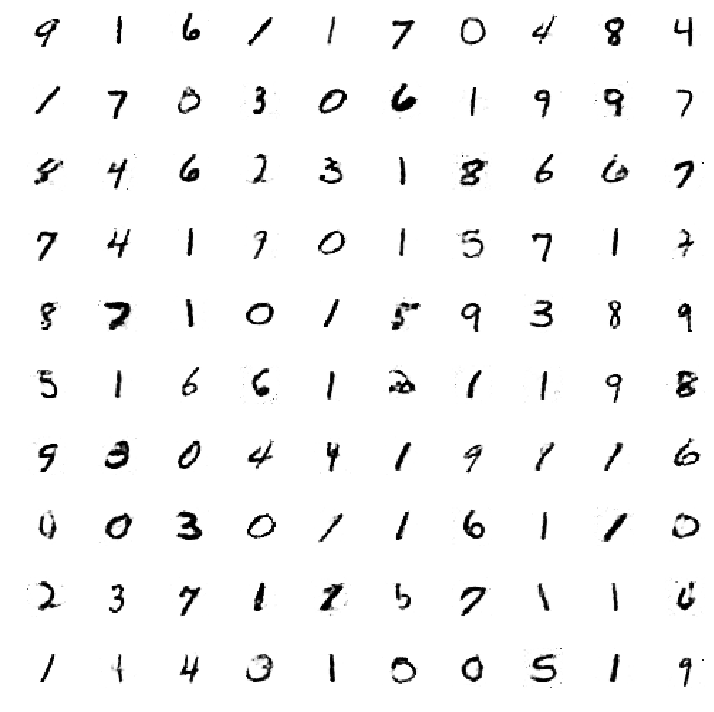

In [48]:
train(400, 128)